# MongoDB Operation

## Install Dependency 

In [1]:
!python -m pip install pymongo

distutils: C:\Users\jkfra\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\jkfra\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\jkfra\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\jkfra\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'C:\Users\jkfra\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
!python -m pip install pymongo

distutils: C:\Users\jkfra\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\jkfra\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: C:\Users\jkfra\anaconda3\Include\UNKNOWN
sysconfig: C:\Users\jkfra\anaconda3\Include
user = False
home = None
root = None
prefix = None
You should consider upgrading via the 'C:\Users\jkfra\anaconda3\python.exe -m pip install --upgrade pip' command.


## Connection for DB

In [8]:
import pymongo

In [51]:
DEFAULT_CONNECTION_URL = "mongodb://localhost:27017/"
DB_NAME = "local"

# Establish a connection with mongoDB
client = pymongo.MongoClient(DEFAULT_CONNECTION_URL)

# Create a DB
dataBase = client[DB_NAME]

In [10]:
# lets see what the existing list of DBs -

client.list_database_names()

['admin', 'config', 'local']

In [11]:
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [52]:
# let's verify whether we have our database in the list or not 
# we'll use the following function:-

def checkExistence_DB(DB_NAME, client):
    """It verifies the existence of DB"""
    DBlist = client.list_database_names()
    if DB_NAME in DBlist:
        print(f"DB: '{DB_NAME}' exists")
        return True
    print(f"DB: '{DB_NAME}' not yet present OR no collection is present in the DB")
    return False


_ = checkExistence_DB(DB_NAME=DB_NAME, client=client)

DB: 'local' exists


In [55]:
COLLECTION_NAME = "Tech products"
collection = dataBase[COLLECTION_NAME]

In [56]:
# let's verify whether we have our database in the list or not 
# we'll use the following function:-

def checkExistence_COL(COLLECTION_NAME, DB_NAME, db):
    """It verifies the existence of collection name in a database"""
    collection_list = db.list_collection_names()
    
    if COLLECTION_NAME in collection_list:
        print(f"Collection:'{COLLECTION_NAME}' in Database:'{DB_NAME}' exists")
        return True
    
    print(f"Collection:'{COLLECTION_NAME}' in Database:'{DB_NAME}' does not exists OR \n\
    no documents are present in the collection")
    return False


_ = checkExistence_COL(COLLECTION_NAME=COLLECTION_NAME, DB_NAME=DB_NAME, db=dataBase)

Collection:'Tech products' in Database:'local' does not exists OR 
    no documents are present in the collection


In [15]:
db_1 = client["Frason"]

In [14]:
client.list_database_names()

['admin', 'config', 'local']

In [20]:
db_1

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Frason')

In [21]:
collection = db_1["test"]
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Frason'), 'test')

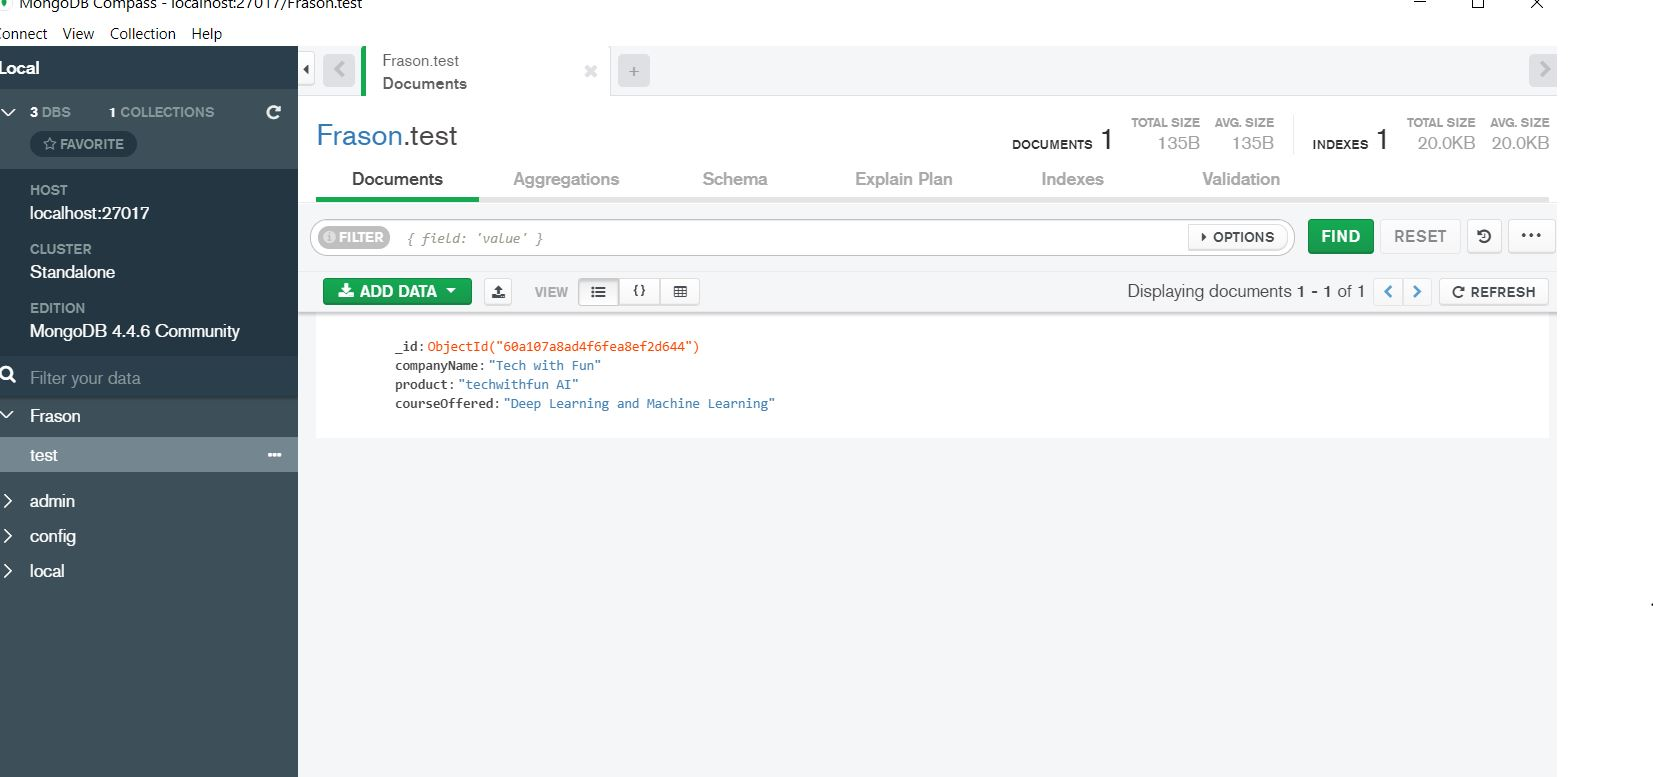

# Insterting a record in the collection

In [30]:
record = {'companyName': 'Tech with Fun',
         'product': 'techwithfun AI',
         'courseOffered': 'Deep Learning and Machine Learning',
         'Name': ["Frason Francis",201903020],
          "record_dict":{"name":"Frason","mail_id":"ffkalapurackal@gmail.com","ph_no":7218643988}
         }

collection.insert_one(record)

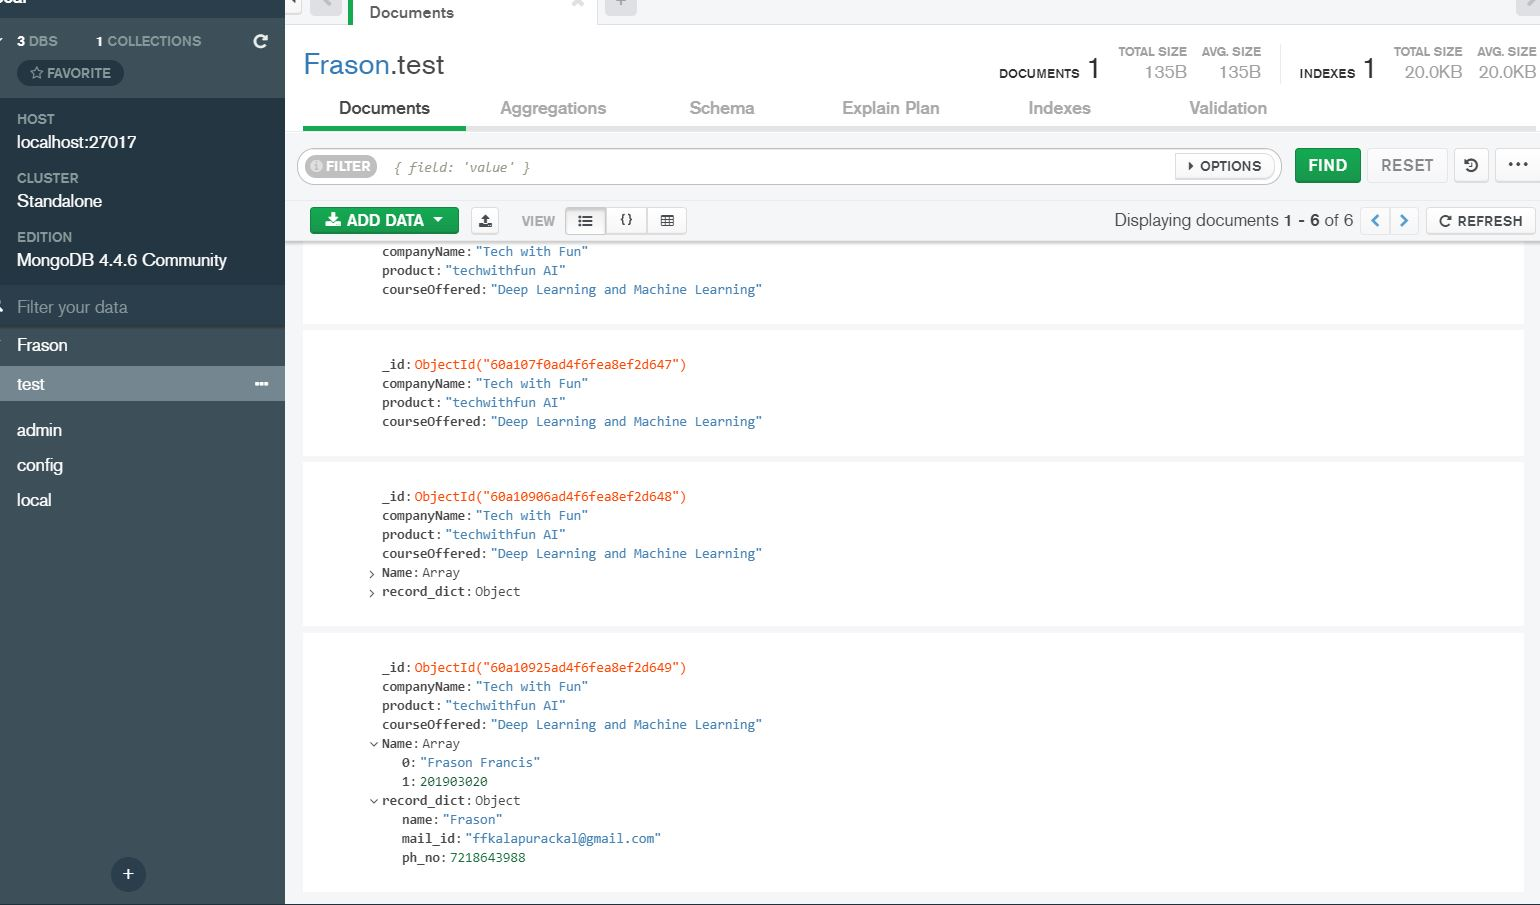

## Inserting Multiple Records

In [31]:

list_of_records = [
    {'companyName': 'Tech with Fun',
         'product': 'techwithfun AI',
         'courseOffered': 'Deep Learning and Machine Learning',
         'Name': ["Frason Francis",201903020],
    },
    
    {'companyName': 'EDx',
     'product': 'Affordable AI',
     'courseOffered': 'Deep Learning for NLP and Computer vision'},
    
    {'companyName': 'Google',
     'product': 'Master Program',
     'courseOffered': 'Data Science Masters Program'}
]

rec = collection.insert_many(list_of_records)

In [32]:
# lets print he unique ID that of the record that we have inserted -
inserted_IDs = rec.inserted_ids

for idx, unique_ids in enumerate(inserted_IDs):
    print(f"{idx}. {unique_ids}")

0. 60a10a9fad4f6fea8ef2d64a
1. 60a10a9fad4f6fea8ef2d64b
2. 60a10a9fad4f6fea8ef2d64c


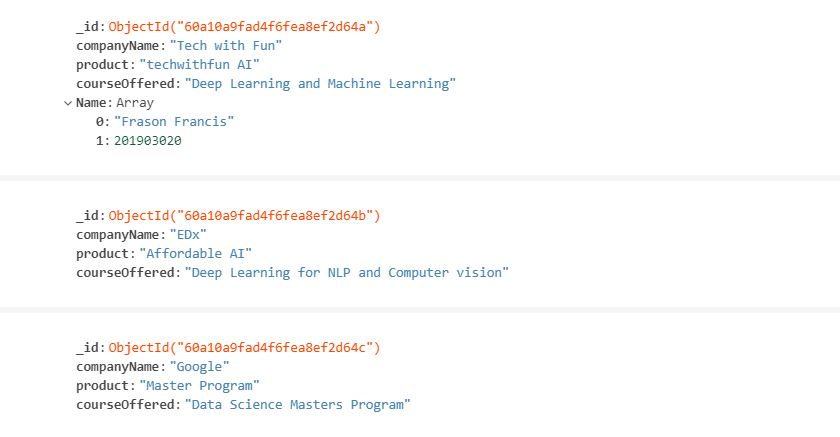

You can override the default unique Id by giving a user defined as shown below -

In [34]:
COLLECTION_NAME = "Tech with Fun"
faculties = dataBase[COLLECTION_NAME]

list_of_records_user_defined_id = [
    {"_id": "1",
    "companyName": "Tech with Fun",
    "Faculty": "Frason Francis"},
    {"_id": "2",
    "companyName": "Tech with Fun",
    "Faculty": "Stalin Joseph"},
]

faculties_record = faculties.insert_many(list_of_records_user_defined_id)

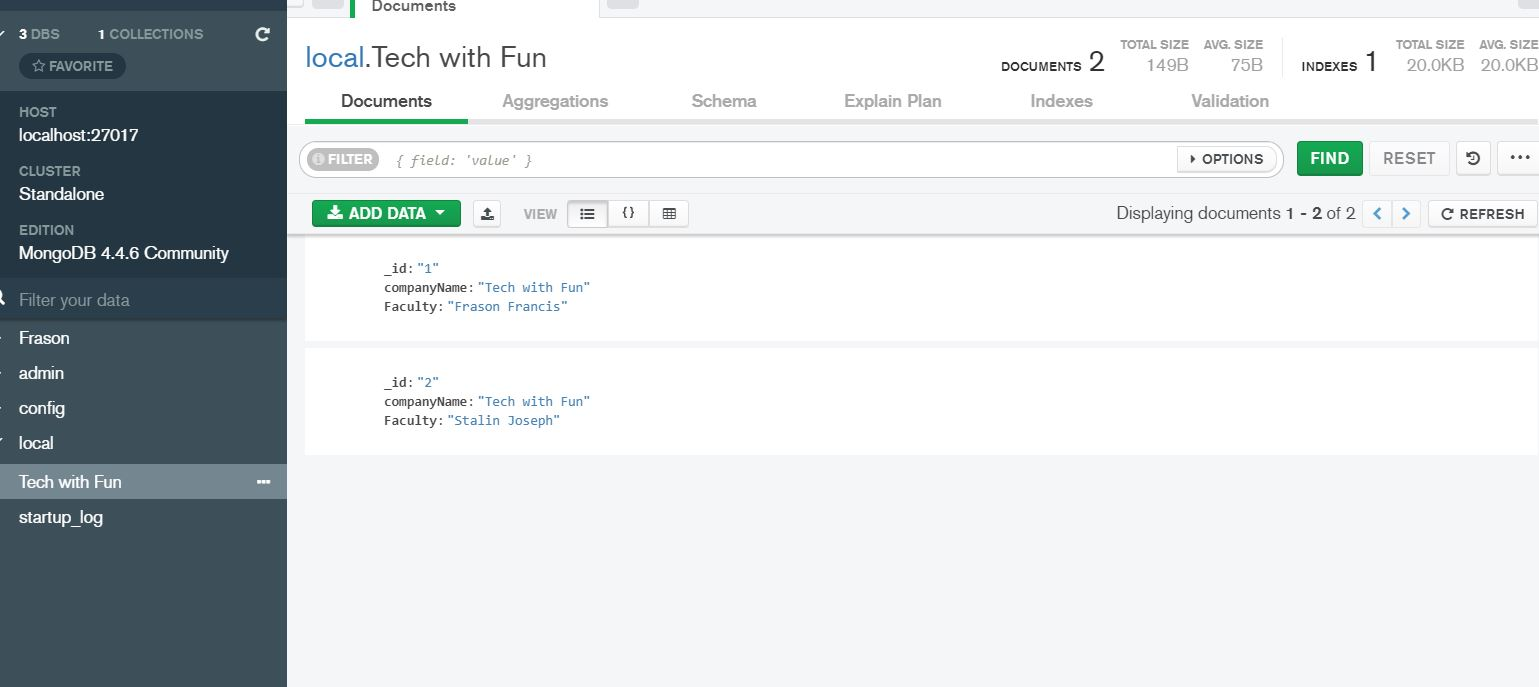

## Finding Methods in DB

In [35]:
find_first_record = faculties.find_one()

print(f"The first record of collection: \n{COLLECTION_NAME} is=\
\n{find_first_record}")

The first record of collection: 
Tech with Fun is=
{'_id': '1', 'companyName': 'Tech with Fun', 'Faculty': 'Frason Francis'}


In [37]:
# finding all the record at once present in the record with all the fields
all_record = faculties.find()

for idx, record in enumerate(all_record):
    print(f"{idx}: {record}")

0: {'_id': '1', 'companyName': 'Tech with Fun', 'Faculty': 'Frason Francis'}
1: {'_id': '2', 'companyName': 'Tech with Fun', 'Faculty': 'Stalin Joseph'}


In [38]:
# finding all the record at once present in the record with SPECIFIC fields
all_record = faculties.find({}, {"Faculty"})

for idx, record in enumerate(all_record):
    print(f"{idx}: {record}")

0: {'_id': '1', 'Faculty': 'Frason Francis'}
1: {'_id': '2', 'Faculty': 'Stalin Joseph'}


##  Query or filter out data in MongoDB

In [39]:
query1 = {"_id": '1'}

results = faculties.find(query1)
for data in results:
    print(data)

{'_id': '1', 'companyName': 'Tech with Fun', 'Faculty': 'Frason Francis'}


In [40]:
query2 = {"_id": {"$gt": "1"}}

results = faculties.find(query2)
for data in results:
    print(data)

{'_id': '2', 'companyName': 'Tech with Fun', 'Faculty': 'Stalin Joseph'}


## Delete one or many documents in MongoDB

In [41]:
# Lets add some random data in faculties
random_data = [
    {'_id': '3', 'companyName': 'Tesla', 'Faculty': 'XYZ'},
    {'_id': '4', 'companyName': 'Tesla', 'Faculty': 'ABC'},
    {'_id': '5', 'companyName': 'Tech with Fun', 'Faculty': 'PQR'},
]

faculties.insert_many(random_data)

In [42]:
# Lets delete one document in faculties
query_to_delete = {"Faculty": "XYZ"}

faculties.delete_one(query_to_delete)

In [43]:
# lets delete multiple record
multi_query_to_delete = {"_id": {"$gte": "4"}}

faculties.delete_many(multi_query_to_delete)

## Drop the entire collection

In [44]:
faculties.drop()

In [66]:
# Lets verify if the collection exists or not after dropping it
COLLECTION_NAME = "Tech products"
DB_NAME = "local"
_ = checkExistence_COL(COLLECTION_NAME=COLLECTION_NAME, DB_NAME=DB_NAME, db=dataBase)

Collection:'Tech products' in Database:'local' does not exists OR 
    no documents are present in the collection


## Update

In [67]:
COLLECTION_NAME = "Tech products"

products = dataBase[COLLECTION_NAME]

all_record = products.find()

for idx, record in enumerate(all_record):
    print(f"{record}\n")

In [68]:
present_data = {'courseOffered': 'Machine Learning with Deployment'}
new_data = {"$set":{'courseOffered': 'ML and DL with Deployment'}}

In [69]:
products.update_one(present_data, new_data)

In [70]:
all_record = products.find()

for idx, record in enumerate(all_record):
    print(f"{record}\n")

## Set limit to view N records

In [71]:
N_records = 3

N_record = products.find().limit(N_records)

for idx, record in enumerate(N_record):
    print(f"{record}\n")

# ------END------